# **Project Name**    -  Sales Prediction : Predicting sales of a major store chain Rossmann 




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**Abhyuday Mishra


# **Project Summary -**

The retail sales regression project is a data analysis project that aims to
determine the factors that influence retail sales in a given region. The project involves collecting and analyzing data on various factors such as store location, advertising expenditure, product prices, and promotions. The objective is to identify the relationship between the various factors and retail sales, and use this information to make informed business decisions.

The first step in the project is to collect data on the various factors that could influence retail sales. This data is typically gathered through surveys, interviews, and other data collection methods. Once the data is collected, it is cleaned and organized for analysis.

The next step is to perform a regression analysis on the data. Regression analysis is a statistical method that is used to identify the relationship between two or more variables. In this case, the goal is to identify the relationship between the various factors and retail sales.

The regression analysis involves fitting a regression model to the data. A regression model is a mathematical equation that describes the relationship between the dependent variable (in this case, retail sales) and one or more independent variables (such as store location, advertising expenditure, product prices, and promotions). The regression model is then used to make predictions about the relationship between the variables.

Linear modeling was used to fit the regression model to the data
Lasso regression analysis is a regularization technique that can help prevent overfitting by penalizing the model for having too many features. The results of the Lasso regression analysis showed that the R2 and adjusted R2 values for this technique are higher than those for linear modeling, indicating that the model may be more accurate.

Decision tree analysis is a non-linear technique that can handle complex relationships between features and the target variable. The low MSE, MAE, and RMSE values for this technique indicate that the model's predictions are generally very close to the actual values. The high R2 and adjusted R2 values indicate that the model can explain a significant amount of the variability in the target variable.

Random forest analysis is an ensemble technique that combines multiple decision trees to improve the accuracy of predictions. The results of the random forest analysis showed that the high R2 value and lower MSE, RMSE, and MAE values for this technique indicate that the model's predictions are more accurate than those from the other techniques. The adjusted R2 value is also high, indicating that the model is not overfitting.

Overall, the results of the modeling techniques suggest that the random forest analysis is the most effective at improving the accuracy of our predictions, followed by decision tree analysis and lasso regression. Linear modeling provided some insights but did not result in as accurate predictions as the other techniques.

The results of this project have important implications for businesses that want to improve their sales performance. By collecting and analyzing data on factors such as store location, advertising expenditure, product prices, and promotions, businesses can make informed decisions about how to increase their sales and improve their profitability.

In addition to the regression analysis, other statistical techniques can also be used to analyze the data. Descriptive statistics can be used to summarize the data, such as the mean and standard deviation of the variables. Correlation analysis can also be used to identify the relationship between two or more variables.

It is important to note that the results of this project are specific to the dataset that was analyzed. The relationship between the various factors and retail sales may be different in other regions or for different types of products. Therefore, it It is important to note that these modeling techniques are only as good as the data that is used to train them. Therefore, it is important to collect high-quality data that is representative of the factors that influence retail sales in the region. Additionally, businesses should continue to collect data and update their models over time to ensure that they remain accurate and relevant.



# **GitHub Link -**

### **https://github.com/abhyudaymishra/-Rossmann-Sales-Prediction-Capstone-2**

# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [92]:
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
#importing the vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# Evaluation metrics
import math
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
sales = pd.read_csv('/content/drive/MyDrive/Regreesion Project Abhyuday/Rossmann Stores Data.csv')
stores = pd.read_csv('/content/drive/MyDrive/Regreesion Project Abhyuday/store.csv')

### Dataset First View

In [6]:
#Checking the first five rows of the Rossman Sales Dataset
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
#Checking the first five rows of the Stores Dataset
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [8]:
#Checking the number of columns and rows in the dataseet
print('Shape of Rossman_sales:', sales.shape)

Shape of Rossman_sales: (1017209, 9)


In [9]:
#Checking the number of columns and rows in the dataseet
print('Shape of new_df:', stores.shape)

Shape of new_df: (1115, 10)


### Dataset Information

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [12]:
#checking for the duplicate values in The Rossman Sales dataset
sales.duplicated().value_counts()

False    1017209
dtype: int64

In [13]:
#checking for the duplicate values
stores.duplicated().value_counts()

False    1115
dtype: int64

There are no duplicate values in the both the datasets


#### Missing Values/Null Values

In [14]:
# Finding out the null values in the Rossman Sales dataset
sales.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
# Finding out the null values in the Stores dataset
stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

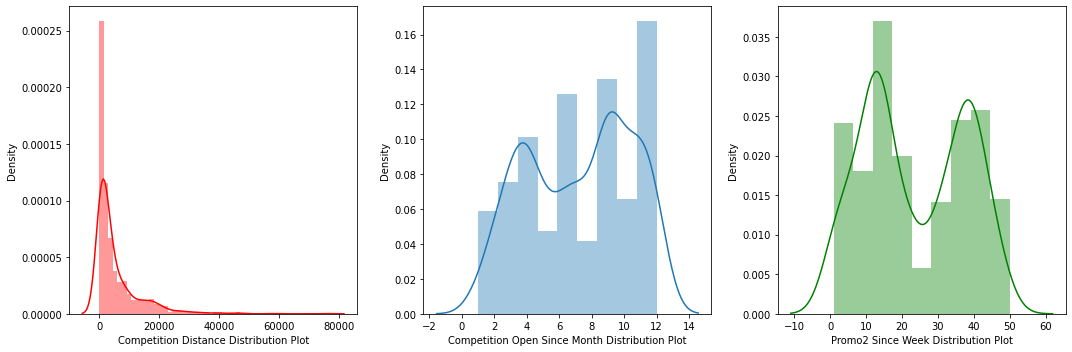

In [17]:
#plotting the nulll values in histogram
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(x=stores['CompetitionDistance'], ax=axs[0],color='r')
axs[0].set_xlabel('Competition Distance Distribution Plot')
sns.distplot(x=stores['CompetitionOpenSinceMonth'], ax=axs[1])
axs[1].set_xlabel('Competition Open Since Month Distribution Plot')
sns.distplot(x=stores['Promo2SinceWeek'], ax=axs[2],color='g')
axs[2].set_xlabel('Promo2 Since Week Distribution Plot')
plt.tight_layout()
plt.show()


### What did you know about your dataset?

Based on the distribution plot of the CompetitionDistance variable, it appears that a majority of the values are concentrated towards the lower end of the range, resulting in a right-skewed distribution. Given this distribution, using the median may be a more appropriate measure of central tendency as it is less sensitive to the effect of outliers than the mean.

In [18]:
# Now we will fill the  competition distance with the median value
stores['CompetitionDistance'].fillna(stores['CompetitionDistance'].median(), inplace = True)

In [19]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores['CompetitionOpenSinceMonth'].fillna(stores['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores['CompetitionOpenSinceYear'].fillna(stores['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [20]:
# imputing the nan values of promo2 related columns with 0
stores['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores['Promo2SinceYear'].fillna(value=0,inplace=True)
stores['PromoInterval'].fillna(value=0,inplace=True)

In [21]:
#recheck if there are null values reamin in the dataset 
stores.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## ***2. Understanding Your Variables***

In [22]:
sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [23]:
stores.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [24]:
sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [25]:
stores.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,7.788341,2010.043946,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,2.779130,5.500844,0.500078,15.542241,1006.038782
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,9.000000,2012.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

In [26]:
#merge the datasets on stores data
new_df = sales.merge(right=stores, on="Store", how="left")

In [27]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


### Check Unique Values for each variable.

In [28]:
#We will create a categorical column list, then check if there are unique values involved and have appropriate data types.
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for col in categorical_variables:
    unique_vals = new_df[col].unique()
    print(f'Unique values for {col}: {unique_vals}')


Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [29]:
#here we can see unique value of holiday have some irregular valueswee will fix them 
new_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [30]:
new_df['StateHoliday'] = new_df['StateHoliday'].apply(lambda x: 0 if x == '0' else x)
new_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [32]:
# convert Date column to datetime format
new_df['Date'] = pd.to_datetime(new_df['Date'])  
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month
new_df['WeekOfYear'] = new_df['Date'].dt.weekofyear
new_df['DayOfYear'] = new_df['Date'].dt.dayofyear
years = new_df['Year'].unique()

## ***3. Basic EDA ,Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Sales vs Customer 

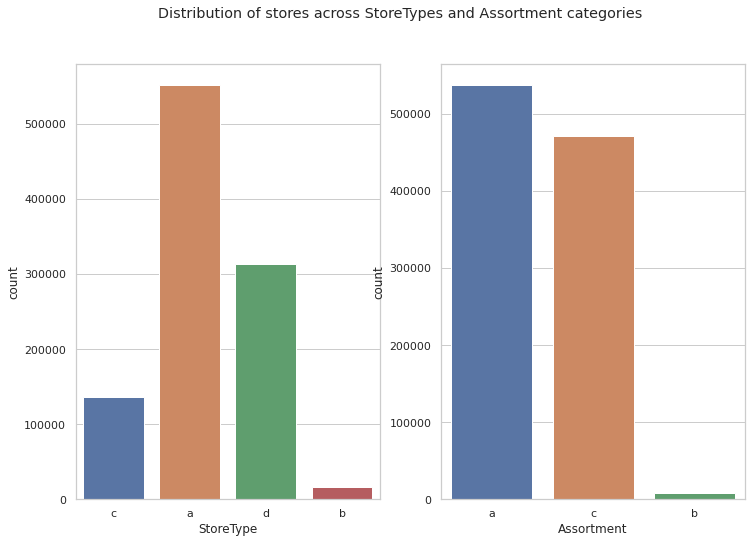

In [33]:
sns.set(style="whitegrid") # set grid style
plt.figure(figsize=(12,8)) # set figure size
# countplot for StoreType
plt.subplot(1,2,1)
sns.countplot(x="StoreType", data=new_df)
#countplot for Assortment
plt.subplot(1,2,2)
sns.countplot(x="Assortment", data=new_df)

plt.suptitle('Distribution of stores across StoreTypes and Assortment categories')
plt.show()


##### 1. Why did you pick the specific chart?

The Count plot Seaborn library is used to plot the frequency distribution of a categorical variable. It is a bar plot that shows the count of each category in the data set.

##### 2. What is/are the insight(s) found from the chart?

Based on the plot, we can observe that there are variations in the distribution of assortments across different stores. Specifically, we can see that some stores have a higher assortment range compared to others. This variation may indicate that different stores cater to different customer needs or preferences. Therefore, it might be useful to investigate the reasons behind the observed differences in assortments and whether they have any impact on store performance or customer satisfaction. Further analysis and exploration of the data may help us gain insights into these questions.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Stores with a higher assortment range may attract a larger customer base, resulting in higher sales. Customers are likely to choose stores that provide them with a wider range of options to choose from. Hence, it's important for businesses to understand the needs and preferences of their customers and adjust the assortment range accordingly to maximize sales.

#### Chart - 2- Correlation between the CompetitionDistance and the average sales 

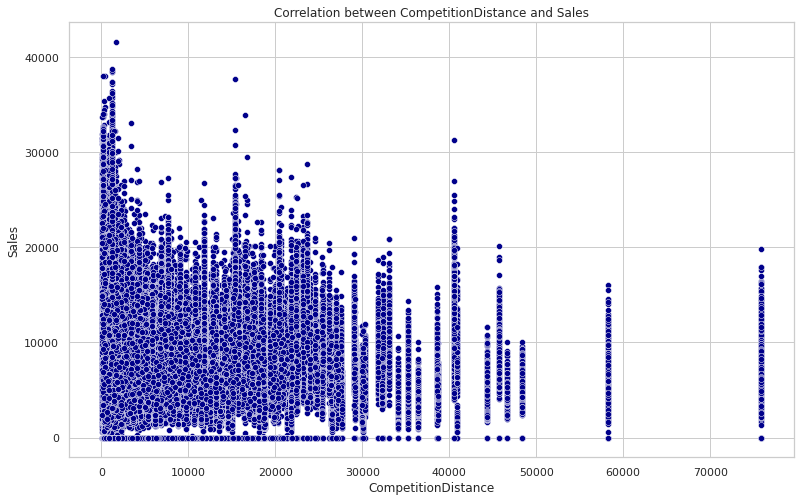

In [34]:
#Is there a correlation between the CompetitionDistance and the average sales 
sns.set(style="whitegrid") # set grid style
plt.figure(figsize=(13,8)) # set figure size
# scatterplot
sns.scatterplot(x="CompetitionDistance", y="Sales", data=new_df,color='Darkblue')
plt.title('Correlation between CompetitionDistance and Sales')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation matrices  are useful tools in exploratory data analysis because they allow us to quickly identify patterns in the data and identify variables that are strongly correlated with each other. This can help us to understand the relationships between different variables in the dataset and guide us in selecting variables for further analysis or modeling.

##### 2. What is/are the insight(s) found from the chart?

We can iterate for mtyhis chart that there is a relationships between the variables being measured

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 3- Week days Effect on the Store


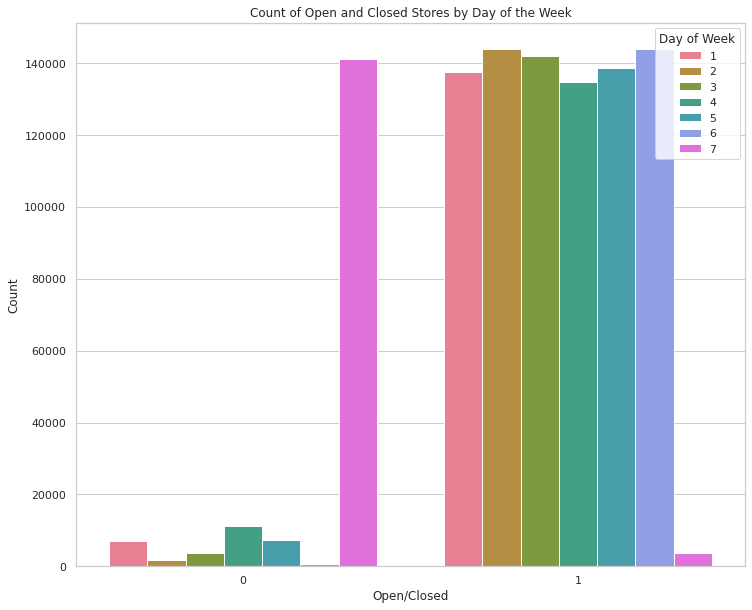

In [36]:
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(x='Open',hue='DayOfWeek', data=new_df, palette="husl", ax=ax)
ax.set_title('Count of Open and Closed Stores by Day of the Week')
ax.set_xlabel('Open/Closed')
ax.set_ylabel('Count')
ax.legend(title='Day of Week', loc='upper right')


##### 1. Why did you pick the specific chart?

countplot is commonly used is that it is easy to implement and provides a clear and concise representation of the categorical data

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that the majority of stores are closed on Sundays.


##### 3. Will the gained insights help creating a positive business impact? 


This could be useful information for businesses that want to plan their operations or staffing schedules.

#### Chart - 4- line chart of sales over time, distinguishing between promotional and non-promotional days

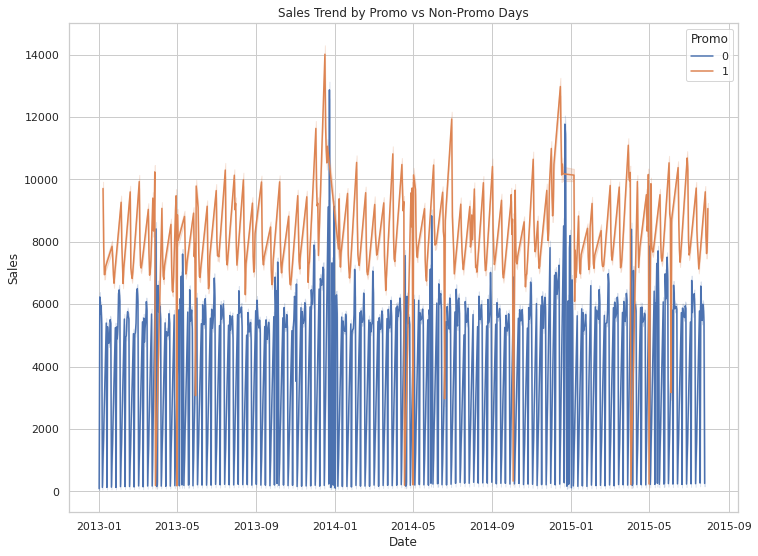

In [37]:
plt.figure(figsize=(12, 9))
sns.lineplot(x="Date", y="Sales", hue="Promo", data=new_df)
plt.title("Sales Trend by Promo vs Non-Promo Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

##### 1. Why did you pick the specific chart?

 The lineplot of the Seaborn can handle data in a wide variety of formats, including Pandas DataFrames and arrays, and can automatically group data by categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Based on the line chart, it appears that promotional days have a higher sales volume than non-promotional days. This suggests that promotions may have a positive impact on sales and could be a useful strategy for increasing revenue. However, further analysis would be needed to determine the effectiveness of specific promotional activities and whether they are cost-effective.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The finding that promotional days have a higher sales volume than non-promotional days could be beneficial to a business. If the business is looking to increase its revenue, it could consider implementing more promotional activities. However, it is important to keep in mind that promotions may come with additional costs, such as marketing expenses or discounts offered to customers.

#### Chart - 5- Correlation between the Customers and the average sales 

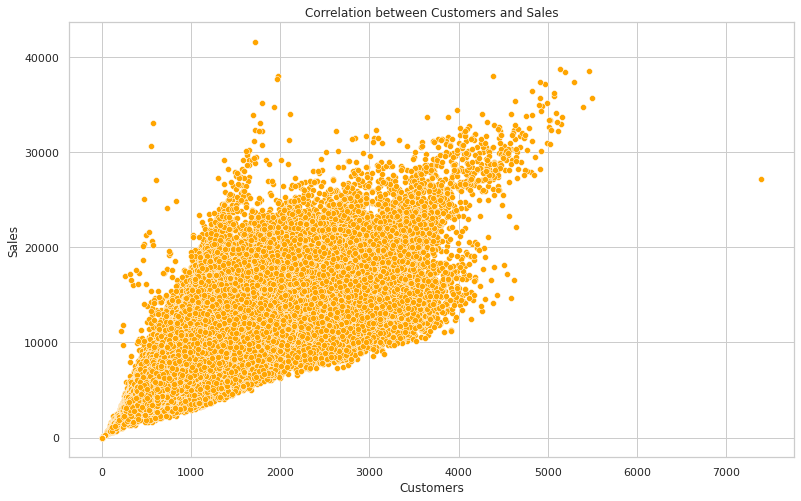

In [38]:
sns.set(style="whitegrid") # set grid style
plt.figure(figsize=(13,8)) # set figure size
# scatterplot
sns.scatterplot(x="Customers", y="Sales", data=new_df,color='orange')
plt.title('Correlation between Customers and Sales')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation matrices are useful tools in exploratory data analysis because they allow us to quickly identify patterns in the data and identify variables that are strongly correlated with each other. This can help us to understand the relationships between different variables in the dataset and guide us in selecting variables for further analysis or modeling

##### 2. What is/are the insight(s) found from the chart?

Sales and customers have a nearly linear relationship. So we can safely say that as the number of customers grows, so will sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that sales and customers have a nearly linear relationship can be very valuable for the business. By understanding this relationship, the business can focus on strategies to increase its customer base, which will in turn increase sales.





#### Chart - 6 - Sales vs Categorical Variables


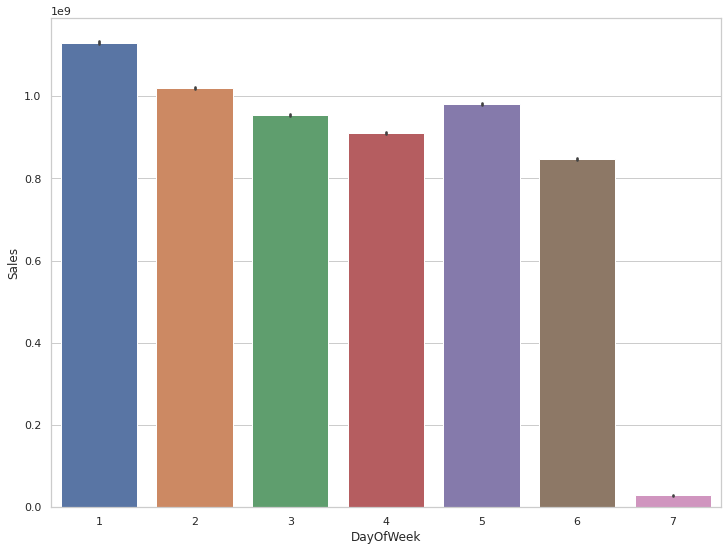

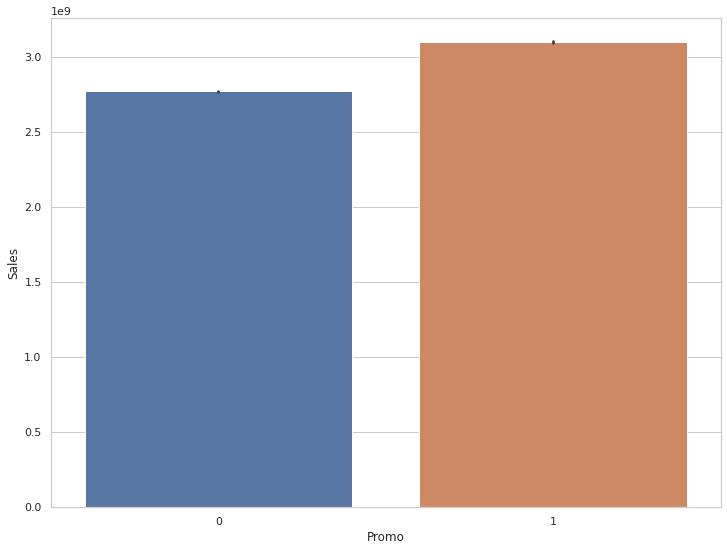

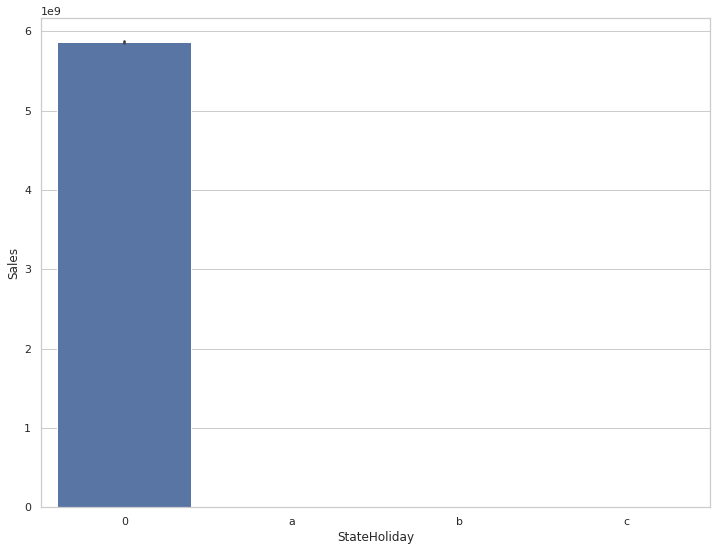

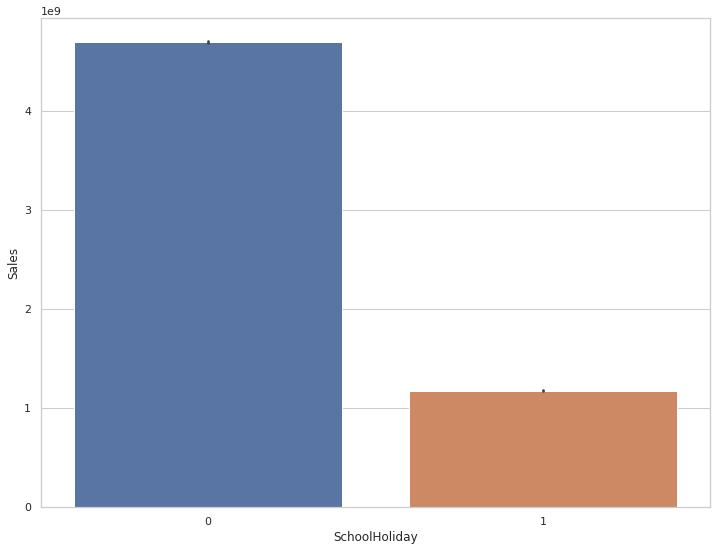

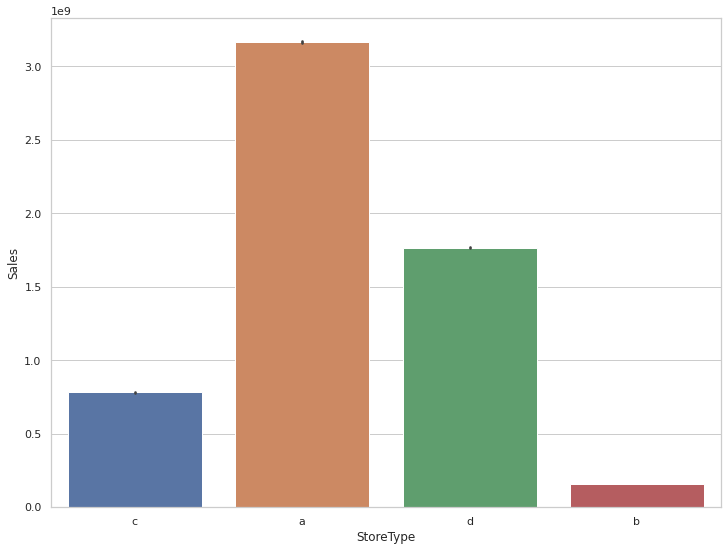

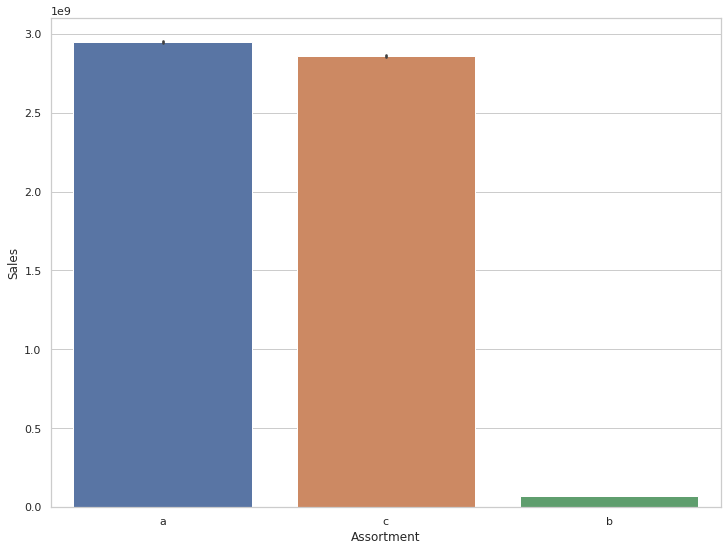

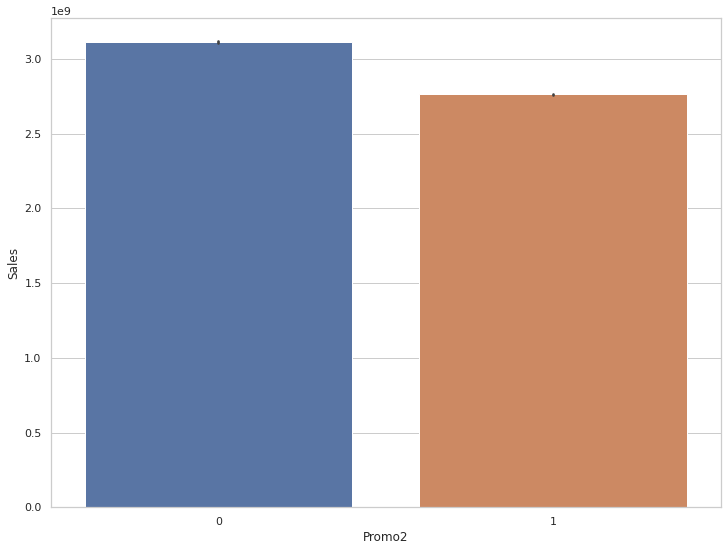

In [ ]:
# Select categorical variables
categorical_variables = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
                         'StoreType', 'Assortment', 'Promo2']
#Loop over categorical variables and create bar plots
for feature in categorical_variables:
     plt.figure(figsize=(12, 9))
     sns.barplot(data=new_df, x=feature, y='Sales', estimator=sum)
     plt.show()


##### 1. Why did you pick the specific chart?

Bar plot is useful for comparing values across different categories. They provide a clear representation of the distribution of a categorical variable and allow you to compare the size of different categories.

##### 2. What is/are the insight(s) found from the chart?

The graphs above revealed the following findings:

Mondays have the highest sales, while Sundays have the lowest sales. This could be because most stores are closed on Sundays, resulting in higher demand on the following day, Monday.
The presence of promotions boosts sales.
Shops are closed on all state holidays, but some are open during school holidays, which may include Saturdays.
School holidays have higher sales than other days.
The most sales are recorded by store type a, owing to the fact that the majority of shops are of this type.
The sale of assortment b is extremely rare.
Participants in Promo 2 may have lower sales because it is seasonal and has no effect.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Promotions and opening during school holidays can increase sales.
Consider diversifying store types and assortments to potentially increase sales.

#### Chart - 7- Distibution of sales

<Axes: ylabel='Density'>

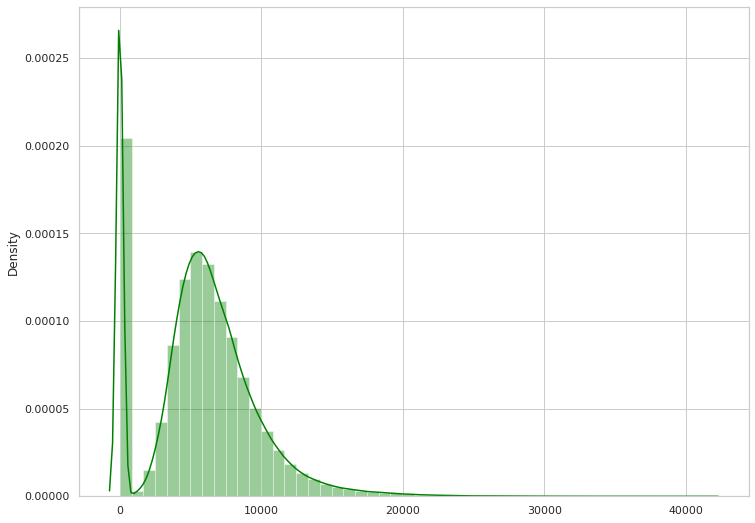

In [ ]:
#distribution plot of Sales
plt.figure(figsize=(12, 9))
sns.distplot(x=new_df['Sales'],color='green')

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Positive skewness in sales data can have important implications for businesses, such as indicating that low-performing products or stores are dragging down overall sales or that the business is heavily reliant on high-performing products.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To address positive skewness in sales data, businesses may need to examine their product or store mix and make adjustments as necessary. This could involve discontinuing low-performing products or stores, investing in marketing or promotions to boost sales, or exploring new product or store categories to diversify their offerings.

#### Chart - 8 Average number of customers per day of the week

Text(0.5, 1.0, 'Average number of customers per day of the week')

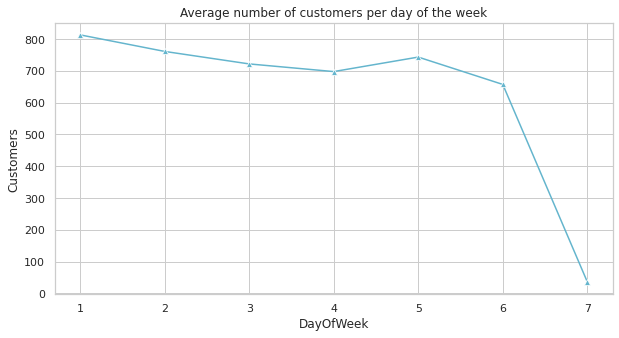

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=new_df, x='DayOfWeek', y='Customers', estimator='mean', ci=None, marker='^', color='c', ax=ax)
ax.set_title('Average number of customers per day of the week')


##### 1. Why did you pick the specific chart?

Line chart is used to display data that changes over time. The main purpose of a line plot is to show the trend or pattern of the data over time and to visualize how different variables are related to each other.

##### 2. What is/are the insight(s) found from the chart?

Sales spike at the start of the week, so the customer footfall. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers consistently show high demand and interest in the product at the start of the week, leading to a spike in sales. The trend of rising sales on Fridays suggests that customers are inclined to purchase products as they approach the weekend, providing a valuable opportunity for businesses to leverage. By comprehending the customer behavior throughout the week, businesses can strategically plan their staffing and inventory requirements.

#### Chart - 10- Average sales by day of the week

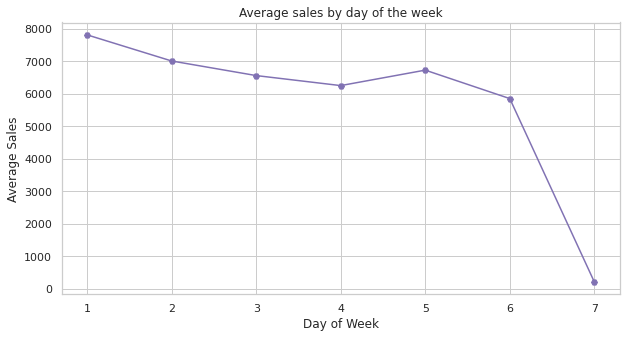

In [41]:
axis = new_df.groupby('DayOfWeek')['Sales'].mean().plot(figsize=(10, 5), marker='H', color='m')
axis.set_title('Average sales by day of the week')
axis.set_xlabel('Day of Week')
axis.set_ylabel('Average Sales')
plt.show()


##### 1. Why did you pick the specific chart?

Line chart is used to display data that changes over time. The main purpose of a line plot is to show the trend or pattern of the data over time and to visualize how different variables are related to each other.

##### 2. What is/are the insight(s) found from the chart?

Sales spike at the start of the week, then fall in the middle of the week, then rise again on Fridays, and finally fall to zero on Sunday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales are consistently spiking at the start of the week, indicating strong demand and interest in the product.
The rise in sales on Fridays indicates that customers are interested in purchasing products as they head into the weekend, which could be a valuable trend to capitalize on.
By understanding the sales cycle throughout the week, businesses can plan their inventory and staffing needs accordingly.

#### Chart - 11- Average sales per month

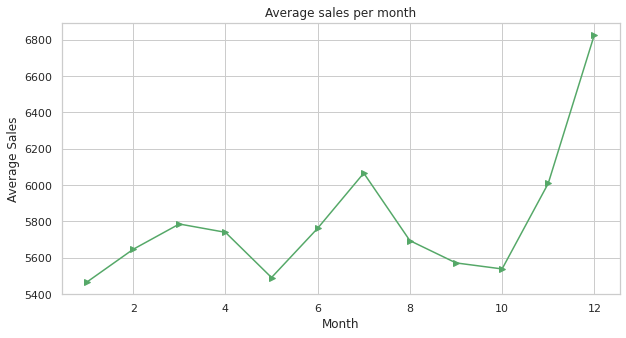

In [43]:
axis = new_df.groupby('Month')['Sales'].mean().plot(figsize=(10, 5), marker='>', color='g')
axis.set_title('Average sales per month')
axis.set_xlabel('Month')
axis.set_ylabel('Average Sales')
plt.show()


##### 1. Why did you pick the specific chart?

Line chart is used to display data that changes over time. The main purpose of a line plot is to show the trend or pattern of the data over time and to visualize how different variables are related to each other.

##### 2. What is/are the insight(s) found from the chart?

Because of the holiday season, most sales are recorded in the year-end months, while the least sales are recorded at the end of the first quarter.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The holiday season can be a crucial time for businesses to generate significant revenue, which can have a positive impact on their overall profitability for the year.
The influx of sales during the year-end months can help businesses meet or exceed their annual sales targets and financial goals.
Understanding the seasonality of sales can help businesses plan their inventory and staffing needs more effectively.
The low sales at the end of the first quarter may result in a decrease in revenue and profitability for businesses, which can negatively impact their financial performance for the year.
Businesses may have to adjust their budgets and cash flow management strategies to account for the uneven distribution of sales throughout the year.




#### Chart - 12- Average customers per month

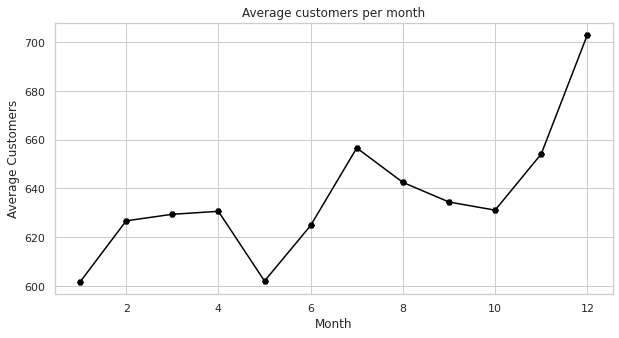

In [45]:
axis = new_df.groupby('Month')['Customers'].mean().plot(figsize=(10, 5), marker='H', color='black')
axis.set_title('Average customers per month')
axis.set_xlabel('Month')
axis.set_ylabel('Average Customers')
plt.show()


##### 1. Why did you pick the specific chart?

Line chart is used to display data that changes over time. The main purpose of a line plot is to show the trend or pattern of the data over time and to visualize how different variables are related to each other.

##### 2. What is/are the insight(s) found from the chart?

Sales and customers are co related  most Customer footfalls are recorded in the year-end months, while the least sales are recorded at the end of the first quarter.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The holiday season can be a crucial time for businesses to generate significant revenue, which can have a positive impact on their overall profitability for the year.

Understanding the seasonality of sales can help businesses plan their inventory and staffing needs more effectively.
The low sales at the end of the first quarter may result in a decrease in revenue and profitability for businesses, which can negatively impact their financial performance for the year.
Businesses may have to adjust their budgets and cash flow management strategies to account for the uneven distribution of sales throughout the year.

#### Chart - 13 - Correlation Heatmap

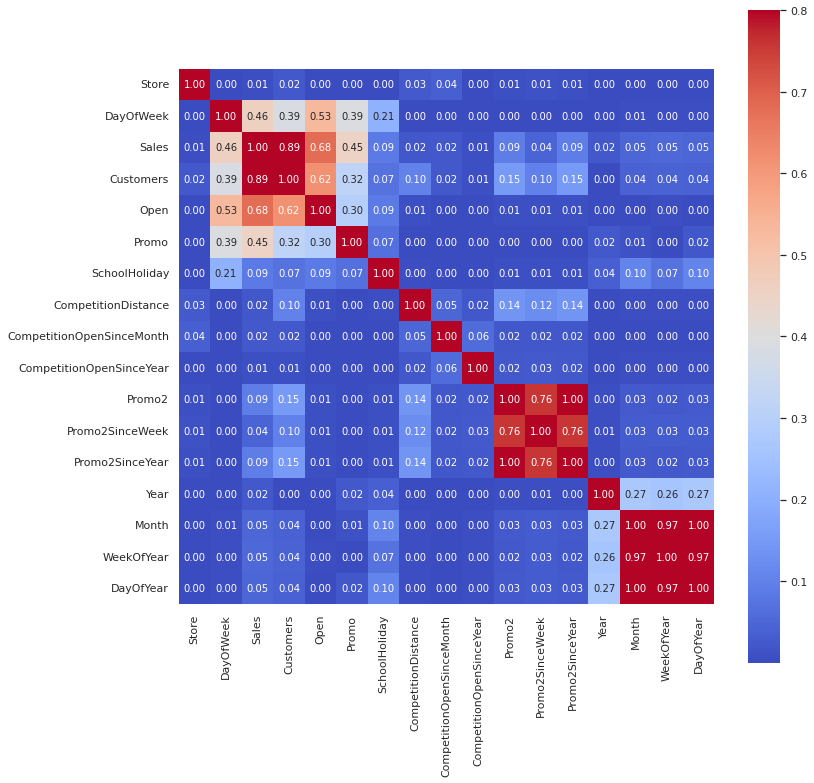

In [ ]:
# generate a correlation matrix using all features in the dataframe
corr_mat = new_df.corr().abs()
# plot heatmap using correlation matrix
fig, axes = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_mat, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True, cmap='coolwarm');

##### 1. Why did you pick the specific chart?

Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

##### 2. What is/are the insight(s) found from the chart?

The correlation matrix shows that there is a negative correlation between sales and weekends, while there are positive correlations with promo, customers, and store opening. Additionally, state holidays negatively impact sales, as indicated by the negative correlation with state holiday column. The scatterplot also revealed that there is a negative correlation between sales and competition distance, indicating that sales reduce as distance from competition increases. the presence of multicollinearity in the dataset can be observed with features such as Promo2, Promo2SinceWeek, and Promo2SinceYear, which have a high degree of correlation. These observations align with the findings from the earlier exploratory analysis using bar plots and scatterplots.

#### Chart - 14 - Pair Plot 

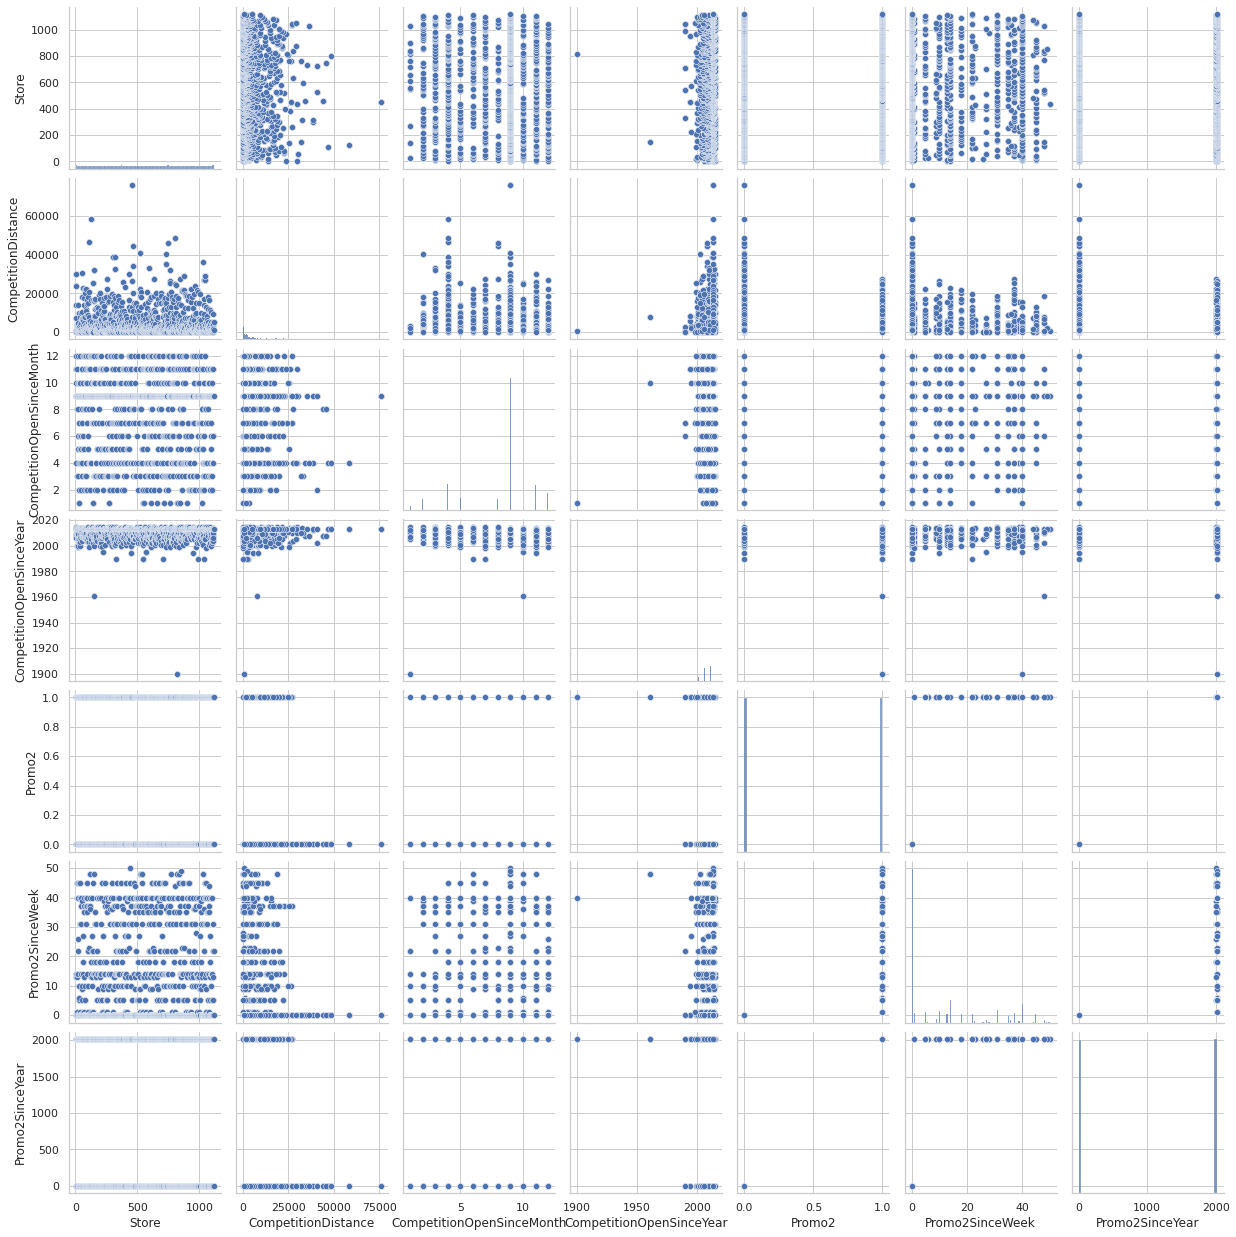

In [49]:
sns.pairplot(new_df[['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']], 
             diag_kind='hist', palette='cividis')


## **4.** **EDA Findings**

* Different stores have a higher assortment range, which may indicate different customer needs or preferences.
* We can clearly see that the majority of stores are closed on Sundays.
*	Promotions may have a positive impact on sales, but further analysis is needed to determine their effectiveness and cost-effectiveness.
*	Sales and customers have a nearly linear relationship. So we can safely say that as the number of customers grows, so will sales.
* Mondays have the highest sales due to higher demand on the following day, while Sundays have the lowest due to the presence of promotions.
*	Positive skewness in sales data can have important implications for businesses, such as indicating that low-performing products or stores are dragging down overall sales or that the business is heavily reliant on high-performing products.
*	Sales spike at the start of the week, so the customer footfall.
•	Sales spike at the start of the week, then fall in the middle of the week, then rise again on Fridays, and finally fall to zero on Sunday.
* The correlation matrix shows a negative correlation between sales and weekends, positive correlations with promo, customers, and store opening, and state holidays negatively impact sales.


## ***5. Feature Engineering & Data Pre-processing***

In [50]:
# exploring the head of the resultant dataframe
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


In [51]:
new_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,0.0,0.0,0,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,...,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1


In [52]:
# taking a copy of the dataset as backup
new_df_backup = new_df.copy()

In [53]:
# convert CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear
# from float to int
new_df = new_df.astype({"CompetitionOpenSinceMonth":int, "CompetitionOpenSinceYear":int, "Promo2SinceWeek":int, "Promo2SinceYear":int})

In [54]:
numerical_independant_features = ['Customers', 'CompetitionDistance',]
X = new_df[numerical_independant_features].values
vif_values = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
temp_df = pd.DataFrame({'Feature': numerical_independant_features, 'VIF': vif_values})
print(temp_df)



               Feature       VIF
0            Customers  1.207393
1  CompetitionDistance  1.207393


### 2. Handling Outliers-
An outlier refers to a data point that deviates considerably from the rest of the data points in a given distribution. While outliers can occur randomly in any dataset, they can typically suggest the presence of either measurement errors or a distribution with heavier tails than the rest of the data.

In [55]:
#changing into boolean 
new_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

Text(0, 0.5, 'Frequency')

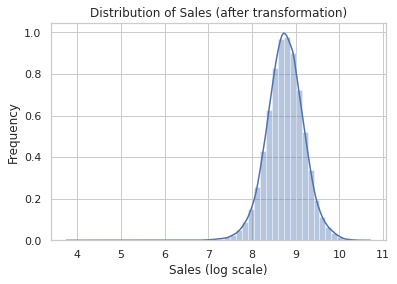

In [56]:
# Transform the 'Sales' column by taking the natural logarithm
new_df['Sales'] = np.log(new_df['Sales'])

# Drop rows with infinite or missing values in the 'Sales' column
new_df.drop(new_df[~np.isfinite(new_df['Sales'])].index, inplace=True)

# Distribution plot of 'Sales'
sns.distplot(new_df['Sales'])

# Set plot title and axes labels
plt.title('Distribution of Sales (after transformation)')
plt.xlabel('Sales (log scale)')
plt.ylabel('Frequency')


In [57]:
# Combine 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' into 'CompetitionOpen' (total months)
new_df['CompetitionOpen'] = (new_df['Year'] - new_df['CompetitionOpenSinceYear']) * 12 + (new_df['Month'] - new_df['CompetitionOpenSinceMonth'])

# Replace negative values in 'CompetitionOpen' with 0
new_df.loc[new_df['CompetitionOpen'] < 0, 'CompetitionOpen'] = 0

# Drop the 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' columns
new_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)


In [58]:
# Combine 'Promo2SinceWeek' and 'Promo2SinceYear' into 'Promo2Open' (total months)
new_df['Promo2Open'] = (new_df['Year'] - new_df['Promo2SinceYear']) * 12 + (new_df['WeekOfYear'] - new_df['Promo2SinceWeek']) * 0.230137

# Replace negative values in 'Promo2Open' with 0
new_df.loc[new_df['Promo2Open'] < 0, 'Promo2Open'] = 0

# Multiply 'Promo2Open' by 'Promo2' to create a new feature 'Promo2running'
def promo2running(row):
    month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = row['PromoInterval'].split(',')
        if month_dict[row['Month']] in months:
            return 1
        else:
            return 0
    except:
        return 0

new_df['Promo2running'] = new_df.apply(promo2running, axis=1) * new_df['Promo2']

# Drop unnecessary columns
new_df.drop(['Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval'], axis=1, inplace=True)


In [59]:
#setting date and store as index
new_df.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
new_df.sort_index(inplace=True)

Total number of outliers present in the Sales column are 6943.


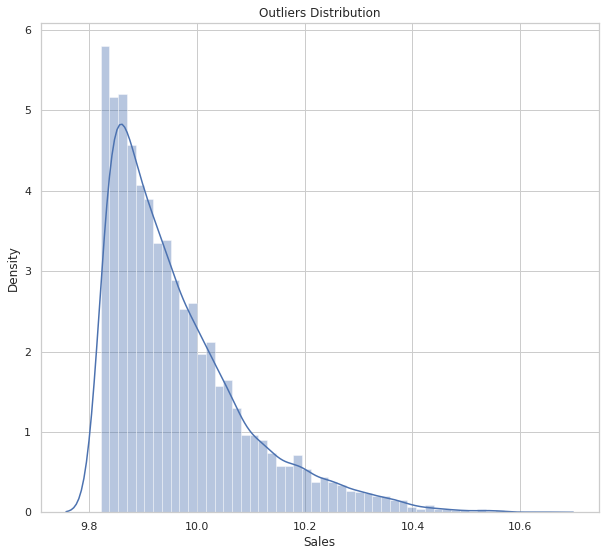

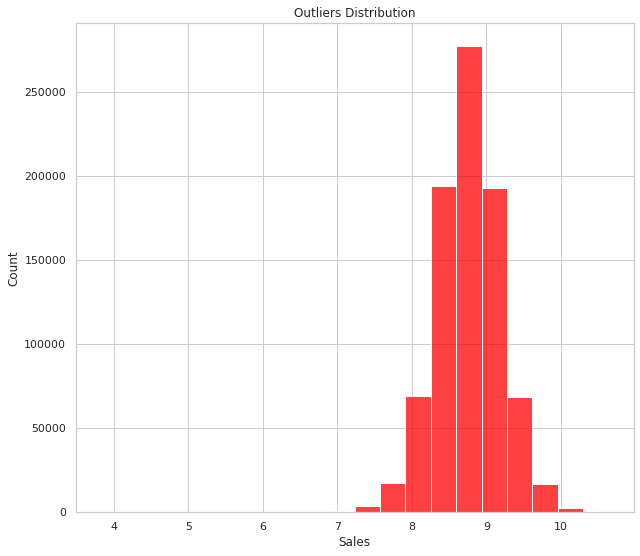

<Figure size 720x648 with 0 Axes>

In [60]:
def identify_and_plot_outliers(dataframe, column_name):
    mean_value = np.mean(dataframe[column_name])
    sd_value = np.std(dataframe[column_name])
    threshold =2.5
    outliers = dataframe[dataframe[column_name] > mean_value + threshold*sd_value][column_name]
    print(f'Total number of outliers present in the {column_name} column are {len(outliers)}.')
    plt.figure(figsize=(10,9))
    sns.distplot(outliers).set(title='Outliers Distribution')
    plt.figure(figsize=(10, 9))
    sns.histplot(x='Sales', data=new_df, bins=20,color='red')
    plt.title('Outliers Distribution')
    plt.figure(figsize=(10, 9))
    
# Identify and plot outliers in the "Sales" column
identify_and_plot_outliers(new_df, 'Sales')


In [62]:
#percentage of sales greater than 10.0
remain_outliers = new_df.loc[new_df['Sales']> 10.0]
percentage_of_outliers = (len(remain_outliers)/len(new_df))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.2406619150150769


In [63]:
remain_outliers.head()

,,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,,
2013-01-02,817,3,10.140810,3462,1,0,0,1,a,a,140.0,0,2013,1,1,2,82,24156.230137,0
2013-01-03,817,4,10.056337,3307,1,0,0,1,a,a,140.0,0,2013,1,1,3,82,24156.230137,0
2013-01-05,523,6,10.022203,2449,1,0,0,0,c,c,50.0,0,2013,1,1,5,0,24156.230137,0
2013-01-06,262,7,10.053630,3479,1,0,0,0,b,a,1180.0,0,2013,1,1,6,0,24156.230137,0
2013-01-07,251,1,10.097697,2797,1,1,0,0,a,c,340.0,0,2013,1,2,7,0,24156.460274,0


In [64]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
remain_outliers.loc[remain_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,,
2013-01-06,262,7,10.053630,3479,1,0,0,0,b,a,1180.0,0,2013,1,1,6,0,24156.230137,0
2013-01-13,262,7,10.043728,3541,1,0,0,0,b,a,1180.0,0,2013,1,2,13,0,24156.460274,0
2013-01-20,262,7,10.098725,3607,1,0,0,0,b,a,1180.0,0,2013,1,3,20,0,24156.690411,0
2013-01-27,262,7,10.072851,3612,1,0,0,0,b,a,1180.0,0,2013,1,4,27,0,24156.920548,0
2013-02-03,262,7,10.272323,4144,1,0,0,0,b,a,1180.0,0,2013,2,5,34,0,24157.150685,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,1,0,0,0,b,a,1180.0,0,2015,6,26,179,25,24185.983562,0
2015-07-05,262,7,10.317417,4762,1,0,0,0,b,a,1180.0,0,2015,7,27,186,26,24186.213699,0
2015-07-12,262,7,10.381924,4623,1,0,0,0,b,a,1180.0,0,2015,7,28,193,26,24186.443836,0


<Figure size 720x648 with 0 Axes>

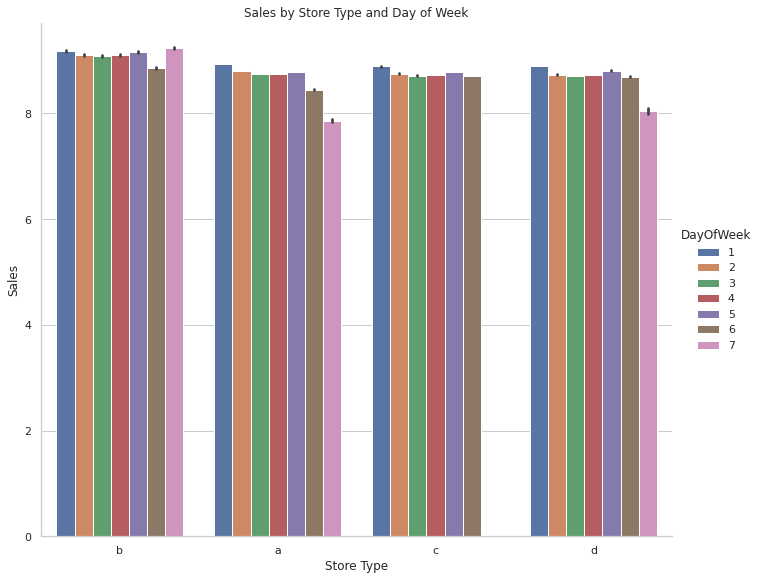

In [65]:
plt.figure(figsize=(10, 9))
sns.catplot(x="StoreType", y="Sales", hue="DayOfWeek", kind="bar", data=new_df, height=8, aspect=1.2)
plt.title("Sales by Store Type and Day of Week")
plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.show()


In [66]:
#checking the same in the whole dataset
new_df.loc[(new_df['DayOfWeek']==7) & (new_df['StoreType']=='b')]

DayOfWeek      Sales  Customers  Open  Promo  StateHoliday  \
Date       Store                                                               
2013-01-06 85             7   9.259987       1509     1      0             0   
           259            7   8.977904       1686     1      0             0   
           262            7  10.053630       3479     1      0             0   
           274            7   8.243283        932     1      0             0   
           335            7   8.883640       1310     1      0             0   
...                     ...        ...        ...   ...    ...           ...   
2015-07-26 733            7   9.691037       3352     1      0             0   
           769            7   9.312446       2783     1      0             0   
           948            7   9.395990       2346     1      0             0   
           1081           7   8.659734        875     1      0             0   
           1097           7   9.496045       2710     1      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-06 85          0  2013      1           1          6               15   
           259         0  2013      1           1          6                0   
           262         0  2013      1           1          6                0   
           274         1  2013      1           1          6                0   
           335         1  2013      1           1          6                0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-26 733         0  2015      7          30        207              189   
           769         1  2015      7          30        207               22   
           948         0  2015      7          30        207               22   
           1081        0  2015      7          30        207              112   
           1097        0  2015      7          30        207              160   

                    Promo2Open  Promo2running  
Date       Store                               
2013-01-06 85     24156.230137              0  
           259    24156.230137              0  
           262    24156.230137              0  
           274        0.000000              1  
           335        0.000000              1  
...                        ...            ...  
2015-07-26 733    24186.904110              0  
           769       31.857534              1  
           948    24186.904110              0  
           1081   24186.904110              0  
           1097   24186.904110              0  

[2216 rows x 18 columns]

##### What all outlier treatment techniques have you used and why did you use those techniques?

Based on our analysis, we have identified that the outliers in the dataset are primarily associated with stores that have promotion = 1 and belong to store type B. Considering the importance of these factors from a business perspective, it would not be prudent to remove or manipulate these outliers. It is evident that there are underlying reasons for the behavior of these outliers, and they are a valid occurrence. Additionally, we have observed that the target variable shows seasonality and cannot be fit using a linear relationship with the other features. Therefore, tree-based machine learning algorithms are more suitable for this type of dataset as they are robust to the effects of outliers.

### 4. Feature Manipulation & Selection

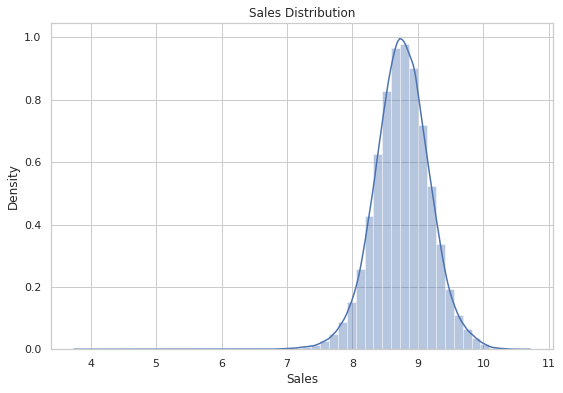

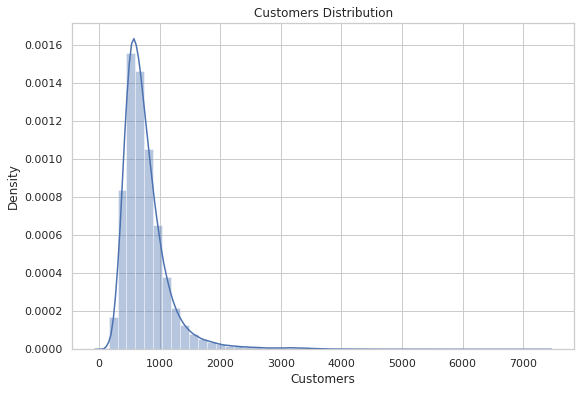

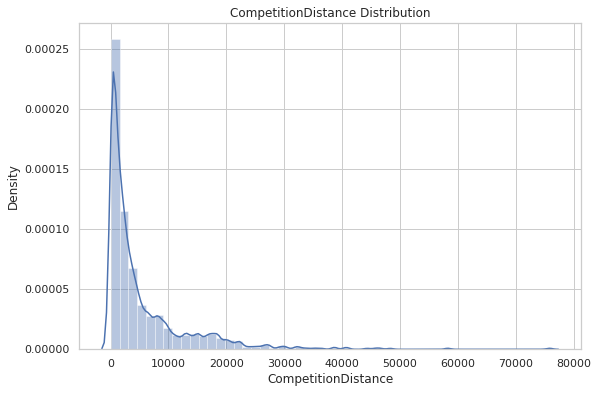

In [67]:
# numerical features
numerical_features = ['Sales', 'Customers', 'CompetitionDistance']

# generating density plot for numerical features
for feature in numerical_features:
  plt.figure(figsize=(9, 6))
  sns.distplot(new_df[feature]).set(title=f'{feature} Distribution')
  plt.show()

### 8. Data Splitting

In [68]:
new_df1 = pd.get_dummies(new_df, columns=['Assortment', 'StoreType'],
                               prefix=['Assortment', 'StoreType'])

In [69]:
new_df1.shape

(844338, 23)

In [70]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 844338 entries, (Timestamp('2013-01-01 00:00:00'), 85) to (Timestamp('2015-07-31 00:00:00'), 1115)
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            844338 non-null  int64  
 1   Sales                844338 non-null  float64
 2   Customers            844338 non-null  int64  
 3   Open                 844338 non-null  int64  
 4   Promo                844338 non-null  int64  
 5   StateHoliday         844338 non-null  int64  
 6   SchoolHoliday        844338 non-null  int64  
 7   CompetitionDistance  844338 non-null  float64
 8   Promo2               844338 non-null  int64  
 9   Year                 844338 non-null  int64  
 10  Month                844338 non-null  int64  
 11  WeekOfYear           844338 non-null  int64  
 12  DayOfYear            844338 non-null  int64  
 13  CompetitionOpen      844338 non-null  int64  
 1

## Analysis of Categorical Features and Data Scaling


In [73]:
categorical_features=list(new_df.describe(include=['object','category']).columns)

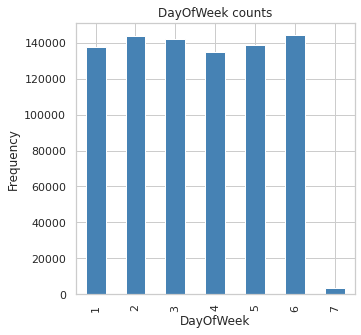

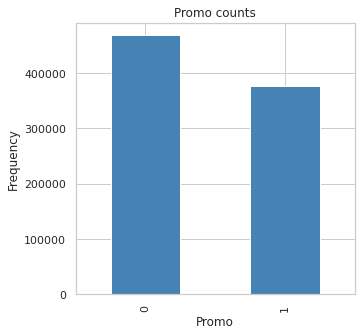

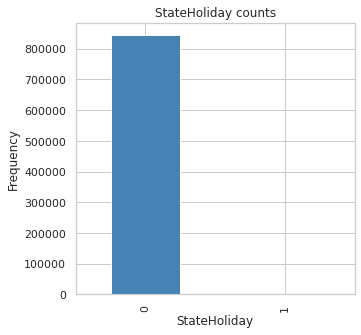

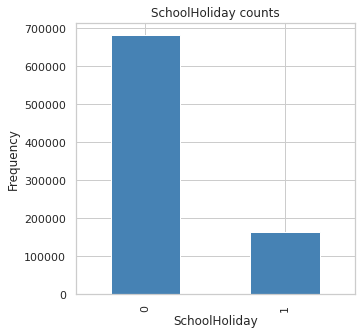

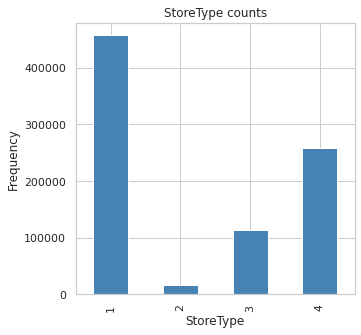

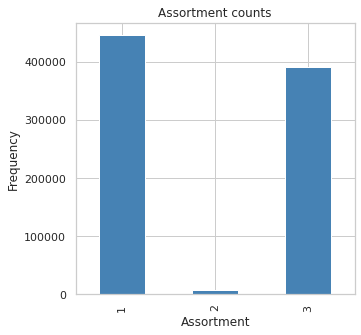

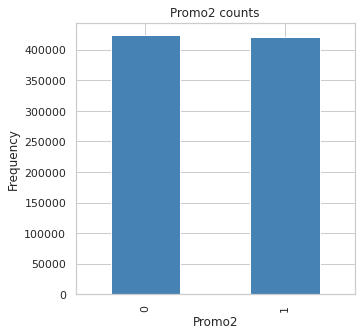

In [117]:
#doing the bar plot on our categorical variable
for col in categorical_features:
    counts = new_df[col].value_counts().sort_index()
    fig,ax=plt.subplots(figsize=(5,5))
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

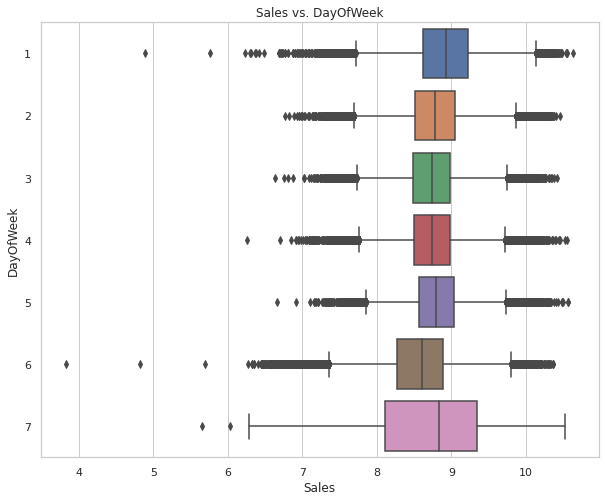

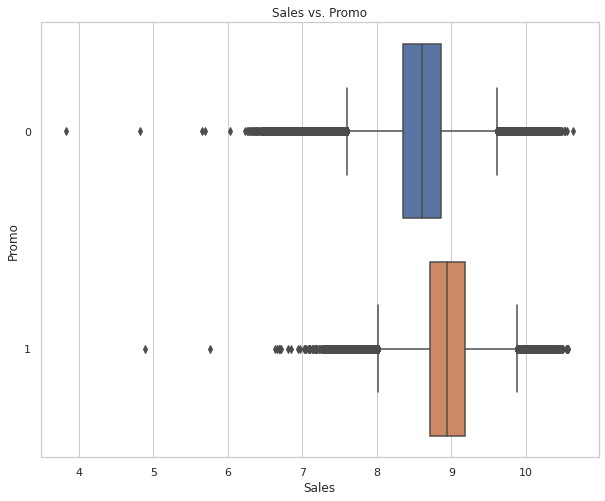

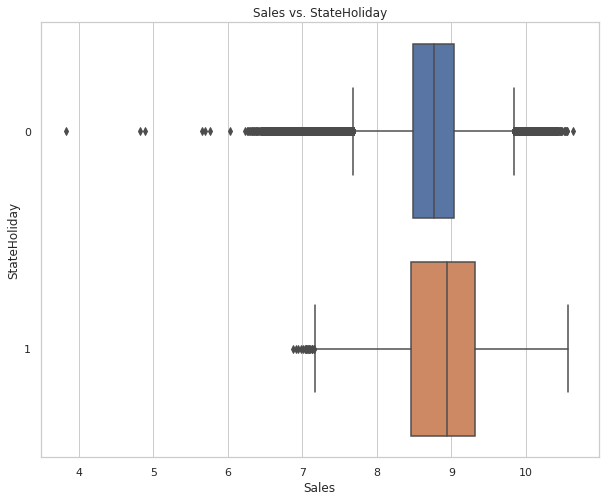

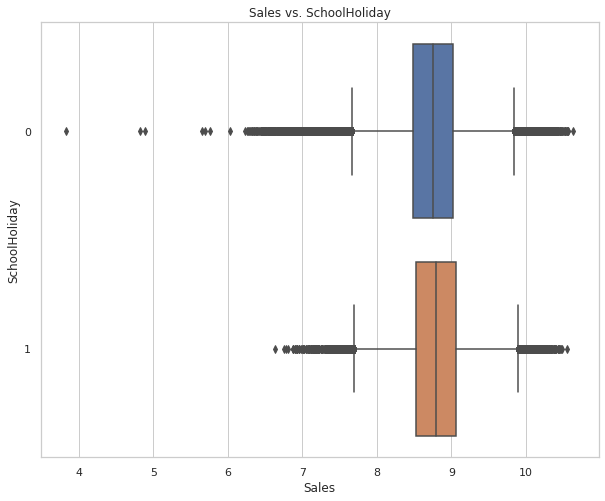

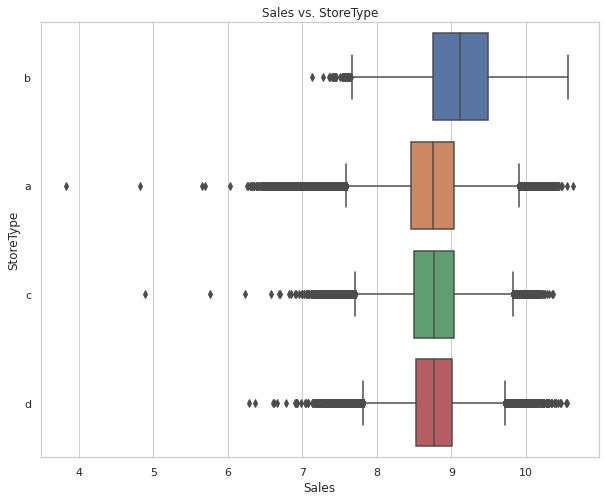

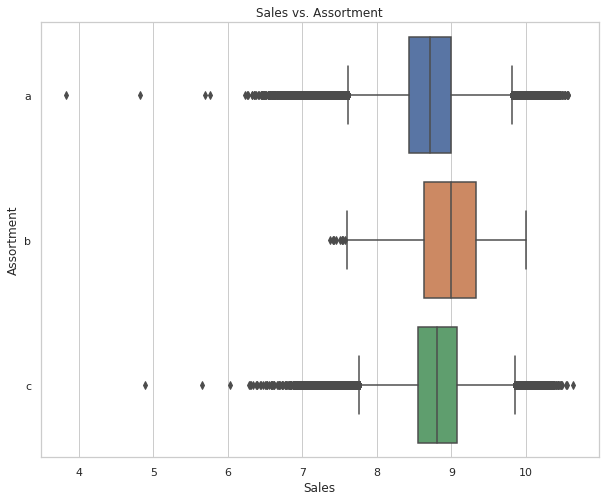

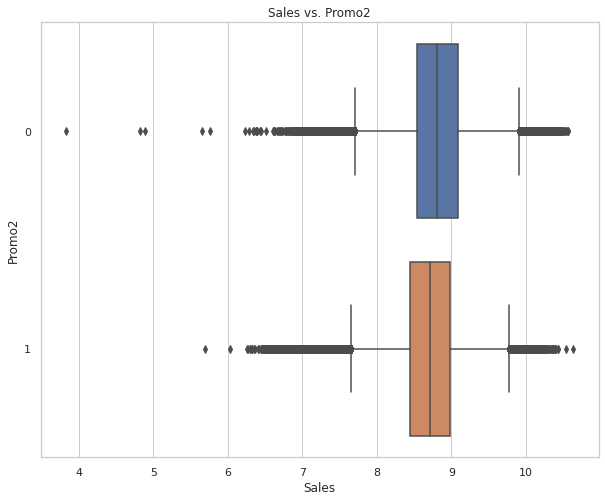

In [78]:
categorical_features = ['DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday','StoreType', 'Assortment', 'Promo2']
for feature in categorical_features:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.boxplot(y=feature, x='Sales', data=new_df, ax=ax, orient='h')
    ax.set_title('Sales vs. ' + feature)
    ax.set_ylabel(feature)
    ax.set_xlabel('Sales')
plt.show()


In [79]:
#let us do the label encoding for categorical features
new_df=new_df.replace({'StoreType':{'a':1,'b':2,'c':3,'d':4},'Assortment':{'a':1,'b':2,'c':3}})
new_df

DayOfWeek      Sales  Customers  Open  Promo  StateHoliday  \
Date       Store                                                               
2013-01-01 85             2   8.347590        619     1      0             1   
           259            2   8.832150       1444     1      0             1   
           262            2   9.756552       2875     1      0             1   
           274            2   8.039802        729     1      0             1   
           335            2   7.783641        482     1      0             1   
...                     ...        ...        ...   ...    ...           ...   
2015-07-31 1111           5   8.652248        422     1      1             0   
           1112           5   9.172223        767     1      1             0   
           1113           5   8.894122        720     1      1             0   
           1114           5  10.222232       3745     1      1             0   
           1115           5   9.068777        538     1      1             0   

                  SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
Date       Store                                                              
2013-01-01 85                 1          2           1               1870.0   
           259                1          2           2                210.0   
           262                1          2           1               1180.0   
           274                1          2           2               3640.0   
           335                1          2           1                 90.0   
...                         ...        ...         ...                  ...   
2015-07-31 1111               1          1           1               1900.0   
           1112               1          3           3               1880.0   
           1113               1          1           3               9260.0   
           1114               1          1           3                870.0   
           1115               1          4           3               5350.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1               15   
           259         0  2013      1           1          1                0   
           262         0  2013      1           1          1                0   
           274         1  2013      1           1          1                0   
           335         1  2013      1           1          1                0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-31 1111        1  2015      7          31        212               13   
           1112        0  2015      7          31        212              111   
           1113        0  2015      7          31        212               22   
           1114        0  2015      7          31        212               22   
           1115        1  2015      7          31        212               22   

                    Promo2Open  Promo2running  
Date       Store                               
2013-01-01 85     24156.230137              0  
           259    24156.230137              0  
           262    24156.230137              0  
           274        0.000000              1  
           335        0.000000              1  
...                        ...            ...  
2015-07-31 1111      24.000000              1  
           1112   24187.134247              0  
           1113   24187.134247              0  
           1114   24187.134247              0  
           1115      38.071233              0  

[844338 rows x 18 columns]

In [80]:
numerical_varriable_list=(list(new_df.describe().columns))

In [81]:
independent_numerical_varriable=list(set(numerical_varriable_list)-{'Sales'})

In [82]:
#now taking only those numerical independent features which are useful for our analysis from vif test obtained
numerical_independent_features=list(set(independent_numerical_varriable)-{'year','month','weak_of_year','avg_customer_sales'})
numerical_independent_features

['Promo2running',
 'CompetitionOpen',
 'WeekOfYear',
 'Promo2',
 'StoreType',
 'DayOfWeek',
 'Customers',
 'DayOfYear',
 'Month',
 'Promo2Open',
 'Open',
 'Assortment',
 'StateHoliday',
 'CompetitionDistance',
 'Year',
 'Promo',
 'SchoolHoliday']

In [83]:
#now combining the categorical_independent_features and numerical_independent_fetaures
independent_features=categorical_features+numerical_independent_features
independent_features

['DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'Promo2',
 'Promo2running',
 'CompetitionOpen',
 'WeekOfYear',
 'Promo2',
 'StoreType',
 'DayOfWeek',
 'Customers',
 'DayOfYear',
 'Month',
 'Promo2Open',
 'Open',
 'Assortment',
 'StateHoliday',
 'CompetitionDistance',
 'Year',
 'Promo',
 'SchoolHoliday']

In [84]:
#now standardising the independent features:
new_df1=new_df[independent_features].apply(zscore)
new_df1

DayOfWeek     Promo  StateHoliday  SchoolHoliday  StoreType  \
Date       Store                                                                
2013-01-01 85     -0.882021 -0.897894     30.444112        2.04105  -0.150686   
           259    -0.882021 -0.897894     30.444112        2.04105  -0.150686   
           262    -0.882021 -0.897894     30.444112        2.04105  -0.150686   
           274    -0.882021 -0.897894     30.444112        2.04105  -0.150686   
           335    -0.882021 -0.897894     30.444112        2.04105  -0.150686   
...                     ...       ...           ...            ...        ...   
2015-07-31 1111    0.858410  1.113717     -0.032847        2.04105  -0.884161   
           1112    0.858410  1.113717     -0.032847        2.04105   0.582788   
           1113    0.858410  1.113717     -0.032847        2.04105  -0.884161   
           1114    0.858410  1.113717     -0.032847        2.04105  -0.884161   
           1115    0.858410  1.113717     -0.032847        2.04105   1.316263   

                  Assortment    Promo2  Promo2running  CompetitionOpen  \
Date       Store                                                         
2013-01-01 85      -0.943002 -0.997343      -0.455749        -0.462627   
           259      0.063948 -0.997343      -0.455749        -0.697817   
           262     -0.943002 -0.997343      -0.455749        -0.697817   
           274      0.063948  1.002664       2.194192        -0.697817   
           335     -0.943002  1.002664       2.194192        -0.697817   
...                      ...       ...            ...              ...   
2015-07-31 1111    -0.943002  1.002664       2.194192        -0.493986   
           1112     1.070897 -0.997343      -0.455749         1.042586   
           1113     1.070897 -0.997343      -0.455749        -0.352872   
           1114     1.070897 -0.997343      -0.455749        -0.352872   
           1115     1.070897  1.002664      -0.455749        -0.352872   

                  WeekOfYear  ...  DayOfYear     Month  Promo2Open  Open  \
Date       Store              ...                                          
2013-01-01 85      -1.573806  ...  -1.592083 -1.457833    0.996073   NaN   
           259     -1.573806  ...  -1.592083 -1.457833    0.996073   NaN   
           262     -1.573806  ...  -1.592083 -1.457833    0.996073   NaN   
           274     -1.573806  ...  -1.592083 -1.457833   -1.004830   NaN   
           335     -1.573806  ...  -1.592083 -1.457833   -1.004830   NaN   
...                      ...  ...        ...       ...         ...   ...   
2015-07-31 1111     0.510986  ...   0.489424  0.347245   -1.002842   NaN   
           1112     0.510986  ...   0.489424  0.347245    0.998633   NaN   
           1113     0.510986  ...   0.489424  0.347245    0.998633   NaN   
           1114     0.510986  ...   0.489424  0.347245    0.998633   NaN   
           1115     0.510986  ...   0.489424  0.347245   -1.001676   NaN   

                  Assortment  StateHoliday  CompetitionDistance      Year  \
Date       Store                                                            
2013-01-01 85      -0.943002     30.444112            -0.458917 -1.070341   
           259      0.063948     30.444112            -0.671708 -1.070341   
           262     -0.943002     30.444112            -0.547366 -1.070341   
           274      0.063948     30.444112            -0.232025 -1.070341   
           335     -0.943002     30.444112            -0.687090 -1.070341   
...                      ...           ...                  ...       ...   
2015-07-31 1111    -0.943002     -0.032847            -0.455071  1.502764   
           1112     1.070897     -0.032847            -0.457635  1.502764   
           1113     1.070897     -0.032847             0.488388  1.502764   
           1114     1.070897     -0.032847            -0.587104  1.502764   
           1115     1.070897     -0.032847            -0.012824  1.502764   

          

In [85]:
#now doing the log transformation on the dependent feature
dependent_features='Sales'
new_df2=pd.DataFrame(np.log10(new_df[dependent_features]))
new_df2

Sales
Date       Store          
2013-01-01 85     0.921561
           259    0.946066
           262    0.989296
           274    0.905245
           335    0.891183
...                    ...
2015-07-31 1111   0.937129
           1112   0.962475
           1113   0.949103
           1114   1.009546
           1115   0.957549

[844338 rows x 1 columns]

## **Linear Regression Modelling on dataset**

In [88]:
X_train, X_test, y_train, y_test = train_test_split(new_df1,new_df2,test_size = 0.2,random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(675470, 22)
(168868, 22)


In [89]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.21298836785804742

In [90]:
reg.coef_

array([[ 1.64367675e+11,  7.75812465e+09,  1.46197360e+09,
        -3.63279118e+10,  8.27994943e+09, -1.70034496e+10,
        -9.74876278e+10, -1.25720536e-04, -3.22677242e-05,
         4.21235220e-04,  9.74876278e+10, -8.27994943e+09,
        -1.64367675e+11, -3.34435786e-03,  4.44170090e-03,
         6.43139140e-01,  1.70034496e+10, -1.46197360e+09,
        -1.51526928e-03,  7.73519278e-04, -7.75812465e+09,
         3.63279118e+10]])

In [91]:
reg.intercept_

array([0.9418605])

In [93]:
a2_pred = reg.predict(X_test)
MSE  = mean_squared_error(10**(y_test), 10**(a2_pred))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2 = r2_score(10**(y_test), 10**(a2_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(a2_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.14250712138038946
RMSE : 0.3775011541444469
R2 : 0.20923614406563917
Adjusted R2 :  0.20913310989328848


## **Lasso Regression Modelling on dataset**

In [94]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [97]:
lasso.score(X_train, y_train)

0.1938054346884588

In [98]:
lasso.coef_

array([-1.02385539e-03,  7.29579743e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.62390595e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.80448828e-11,  0.00000000e+00,  4.21113512e-04,  1.42452240e-03,
        9.72957495e-06,  0.00000000e+00, -7.44430686e-05,  0.00000000e+00,
        4.82562895e-06,  0.00000000e+00])

In [99]:
a2_pred_lasso=lasso.predict(X_test)
r2 = r2_score(10**(y_test), 10**(a2_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(a2_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.1932084501037018
Adjusted R2 :  0.19313837159700475


####  Cross- Validation & Hyperparameter Tuning For Lasso 

In [100]:
lasso = Lasso()
parameters = {'alpha': [1e-30,1e-25,1e-20,1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-30, 1e-25, 1e-20, 1e-15, 1e-13, 1e-10,
                                   1e-08, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 45, 50, 55, 60, 100,
                                   0.0014]},
             scoring='neg_mean_squared_error')

In [101]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-30}

Using  {'alpha': 1e-30}  the negative mean squared error is:  -0.00035493660261201116


In [102]:
y_pred_lasso_cv = lasso_regressor.predict(X_test)
y_pred_lasso_cv

array([0.92345886, 0.93546112, 0.93745925, ..., 0.93522502, 0.92758225,
       0.93406216])

In [103]:
r2 = r2_score(10**(y_test), 10**(y_pred_lasso_cv))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso_cv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.2110295261018268
Adjusted R2 :  0.2109609955468824


From the cross-validation results, it appears that the alpha value is approaching zero, indicating that the penalty term is also close to zero. This suggests that our model is not overfitting and therefore, we may not need to perform ridge and elastic net regression analyses.

In [104]:
#plotting the linear regression graph for real and predicted varriable y
simple_lr_pred = y_pred_lasso_cv[:100]
simple_lr_real = y_test[:100]
dt_lr = pd.DataFrame([(y_pred_lasso_cv[:100]),((y_test[:100])['Sales'].values)]).T
dt_lr.rename(columns={0:'Real',1:'predicted'},inplace=True)

In [105]:
#storing absolute difference between actual sales price and predicted
dt_lr['diff']=abs(dt_lr['Real']-dt_lr['predicted'])
dt_lr

,Real,predicted,diff
0,0.923459,0.926325,0.002866
1,0.935461,0.903127,0.032334
2,0.937459,0.933733,0.003726
3,0.933373,0.945648,0.012275
4,0.943329,0.962282,0.018953
...,...,...,...
95,0.940622,0.940385,0.000237
96,0.931961,0.945394,0.013432
97,0.947348,0.959295,0.011946
98,0.936501,0.935767,0.000734


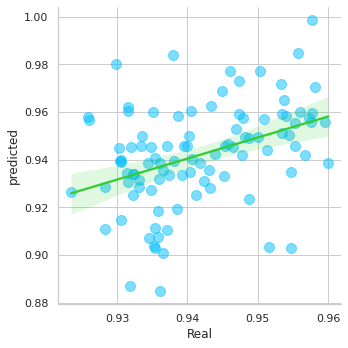

In [108]:
sns.lmplot(x='Real', y='predicted', data=dt_lr, line_kws={'color': 'limegreen'}, scatter_kws={'color': 'deepskyblue', 'alpha': 0.5, 's': 100});



## **Decision Tree Regression Analysis**


In [109]:
#decision tree evaluation metrics calculation
decision_tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=7,min_samples_split=6)
decision_tree.fit(X_train, y_train)
v_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)

MSE = mean_squared_error(y_test,v_pred_dt)
print("MSE:", MSE)

MAE = mean_absolute_error(y_test, v_pred_dt)
print("MAE:", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

r2 = r2_score(y_test, v_pred_dt)
print("R2 :", r2)

print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(v_pred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 0.0003305045182529033
MAE: 0.01406040921904258
RMSE : 0.018179783228985523
R2 : 0.26838480808625464
Adjusted R2 :  0.26890640905036545


Cross- Validation & Hyperparameter Tuning of Decision tree and try to improve the R2 score


In [110]:
dt_regressor = DecisionTreeRegressor()
param_grid = {'max_depth': [3,5,7,10],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9]}

grid_search = GridSearchCV(dt_regressor, param_grid,scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6}


Updating the hyperparameter to obtain the Most efficient result for the anlysis


In [111]:
#updation of hyperparameter tuning and cross validation
decision_tree = DecisionTreeRegressor(max_depth=10,min_samples_leaf=2,min_samples_split=4)
decision_tree.fit(X_train, y_train)
v_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)

MSE = mean_squared_error(y_test,v_pred_dt)
print("MSE:", MSE)

MAE = mean_absolute_error(y_test, v_pred_dt)
print("MAE:", MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

r2 = r2_score(y_test, v_pred_dt)
print("R2 :", r2)


print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(v_pred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE: 0.0002554530659965679
MAE: 0.012262999412407641
RMSE : 0.015982899173697114
R2 : 0.43452106224755993
Adjusted R2 :  0.43517046795096725


## **Random Forest Regression analysis**

In [112]:
##Random Forest evaluation metrics calculation
random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(X_train,y_train)
y_pred_rf = random_forest.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_rf)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

MAE=mean_absolute_error(y_test,y_pred_rf)
print("MAE :", MAE)

r2 = r2_score(y_test, y_pred_rf)
print("R2 :", r2)


print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.00028350072483269577
RMSE : 0.016837479764878583
MAE : 0.013050704934915985
R2 : 0.37243388289340995
Adjusted R2 :  0.37243109438988453


Cross- Validation & Hyperparameter Tuning of Random Forest

In [114]:
#hyperparameter tuning and cross validation
dt_rfr = RandomForestRegressor()
param_grid_ = {'n_estimators':[15,20,30],
              'max_depth': [5,8,10]}

Random_search = RandomizedSearchCV(dt_rfr, param_grid_,scoring='neg_mean_squared_error',cv=2)
Random_search.fit(X_train,y_train)

print("Best parameters: ",Random_search.best_params_)

Best parameters:  {'n_estimators': 20, 'max_depth': 10}


In [113]:
#updation of hyperparameter tuning and cross validation
random_forest = RandomForestRegressor(n_estimators = 30, max_depth=10)
random_forest.fit(X_train,y_train)
y_pred_rf = random_forest.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_rf)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

MAE=mean_absolute_error(y_test,y_pred_rf)
print("MAE :", MAE)

r2 = r2_score(y_test, y_pred_rf)
print("R2 :", r2)

print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.00024598560270858914
RMSE : 0.015683928165755832
MAE : 0.012050073447909638
R2 : 0.4554785366173072
Adjusted R2 :  0.45653736797413913


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


* Linear modeling showed that the MSE of 0.14250712138038946 and RMSE of  0.3775011541444469 indicate that the model's predictions have an average error of around  0.3775011541444469, which is fairly high. The R2 of 0.209 indicates that the model can explain about 20% of the variability in the target variable. 
* Lasso regression analysis is a regularization technique that can help prevent overfitting by penalizing the model for having too many features. The R2 and adjusted R2 values for this technique are higher than those for linear modeling, indicating that the model may be more accurate.
* Decision tree analysis is a non-linear technique that can handle complex relationships between features and the target variable. The low MSE, MAE, and RMSE values for this technique indicate that the model's predictions are generally very close to the actual values. The high R2 and adjusted R2 values indicate that the model can explain a significant amount of the variability in the target variable.
* Random forest analysis is an ensemble technique that combines multiple decision trees to improve the accuracy of predictions. The high R2 value and lower MSE, RMSE, and MAE values for this technique indicate that the model's predictions are more accurate than those from the other techniques. The adjusted R2 value is also high, indicating that the model is not overfitting.
* Overall, the results of the modeling techniques suggest that the random forest analysis is the most effective at improving the accuracy of our predictions, followed by decision tree analysis and lasso regression. Linear modeling provided some insights but did not result in as accurate predictions as the other techniques.




# **Linear Regrssion**

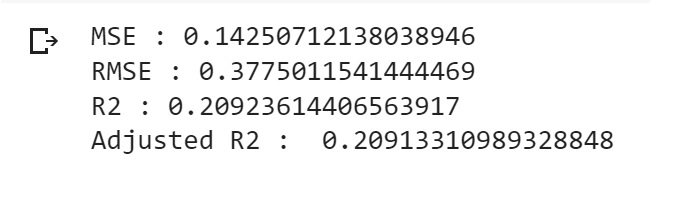

# **Lasso**

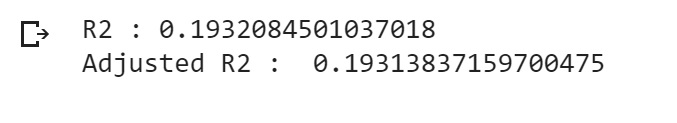

# **Decision Tree**




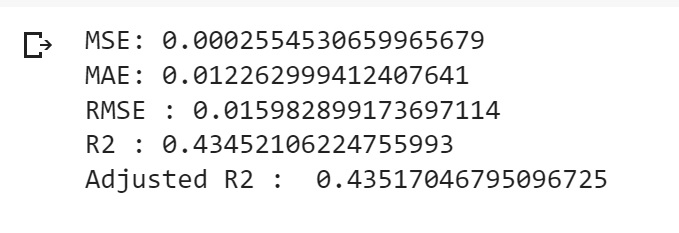

# **Random Forest**

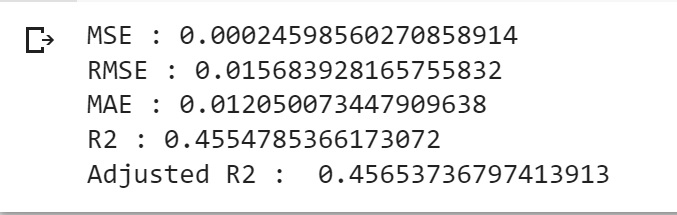

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***